In [1]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Concatenate,UpSampling2D,Dense,SimpleRNN,BatchNormalization,Reshape
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'c:\\Users\\user\\projects\\DHaRT\\DHaRT_project'

In [3]:
from keras.preprocessing.image import ImageDataGenerator
path='c:\\Users\\user\\projects\\DHaRT\\DHaRT_project\\archive'

# Set the paths to the directories
hazy_dir = os.path.join(path,'hazy')
clear_dir = os.path.join(path,'clear')
trans_dir=os.path.join(path,'trans')

# Calculate the number of steps per epoch
batch_size = 10
img_size=(512,512)

# Create the ImageDataGenerator
#train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1,brightness_range=[0.2,1.0],)
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)

# Load the images and create the dataset
train_generator = train_datagen.flow_from_directory(directory=hazy_dir,
                                              target_size=img_size,
                                              batch_size=batch_size,
                                              class_mode=None,
                                              shuffle=False,
                                              subset='training'
                                              )

train_trans_generator = datagen.flow_from_directory(directory=trans_dir,
                                              target_size=img_size,
                                              batch_size=batch_size,
                                              class_mode=None,
                                              shuffle=False,
                                              subset='training'
                                              )

train_labels_generator = datagen.flow_from_directory(directory=clear_dir,
                                                     target_size=img_size,
                                                     batch_size=batch_size,
                                                     class_mode=None,
                                                     shuffle=False,
                                                     subset='training'
                                                     )

val_generator = train_datagen.flow_from_directory(directory=hazy_dir,
                                              target_size=img_size,
                                              batch_size=batch_size,
                                              class_mode=None,
                                              shuffle=False,
                                              subset='validation'
                                              )

val_trans_generator = datagen.flow_from_directory(directory=trans_dir,
                                              target_size=img_size,
                                              batch_size=batch_size,
                                              class_mode=None,
                                              shuffle=False,
                                              subset='validation'
                                              )

val_labels_generator = datagen.flow_from_directory(directory=clear_dir,
                                                     target_size=img_size,
                                                     batch_size=batch_size,
                                                     class_mode=None,
                                                     shuffle=False,
                                                     subset='validation'
                                                     )

train_dataset = zip(zip(train_generator,train_trans_generator), train_labels_generator)
val_dataset = zip(zip(val_generator,val_trans_generator), val_labels_generator)

Found 12591 images belonging to 1399 classes.
Found 12591 images belonging to 1399 classes.
Found 12591 images belonging to 1399 classes.
Found 1399 images belonging to 1399 classes.
Found 1399 images belonging to 1399 classes.
Found 1399 images belonging to 1399 classes.


In [5]:
# from keras.preprocessing.image import ImageDataGenerator
# path='c:\\Users\\user\\projects\\DHaRT\\DHaRT_project\\archive'

# # Set the paths to the directories
# hazy_dir = os.path.join(path,'hazy')
# clear_dir = os.path.join(path,'clear')
# trans_dir=os.path.join(path,'trans')

# # Calculate the number of steps per epoch
# batch_size = 10
# img_size=(512,512)

# # Create the ImageDataGenerator
# datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)

# # Load the images and create the dataset
# train_generator = datagen.flow_from_directory(directory=hazy_dir,
#                                               target_size=img_size,
#                                               batch_size=batch_size,
#                                               class_mode=None,
#                                               shuffle=False,
#                                               subset='training'
#                                               )
# train_trans_generator = datagen.flow_from_directory(directory=trans_dir,
#                                               target_size=img_size,
#                                               batch_size=batch_size,
#                                               class_mode=None,
#                                               shuffle=False,
#                                               subset='training'
#                                               )

# train_labels_generator = datagen.flow_from_directory(directory=clear_dir,
#                                                      target_size=img_size,
#                                                      batch_size=batch_size,
#                                                      class_mode=None,
#                                                      shuffle=False,
#                                                      subset='training'
#                                                      )

# val_generator = datagen.flow_from_directory(directory=hazy_dir,
#                                               target_size=img_size,
#                                               batch_size=batch_size,
#                                               class_mode=None,
#                                               shuffle=False,
#                                               subset='validation'
#                                               )
# val_trans_generator = datagen.flow_from_directory(directory=trans_dir,
#                                               target_size=img_size,
#                                               batch_size=batch_size,
#                                               class_mode=None,
#                                               shuffle=False,
#                                               subset='validation'
#                                               )

# val_labels_generator = datagen.flow_from_directory(directory=clear_dir,
#                                                      target_size=img_size,
#                                                      batch_size=batch_size,
#                                                      class_mode=None,
#                                                      shuffle=False,
#                                                      subset='validation'
#                                                      )
# train_dataset = zip(zip(train_generator,train_trans_generator), train_labels_generator)
# val_dataset = zip(zip(val_generator,val_trans_generator), val_labels_generator)

(512, 512, 3)


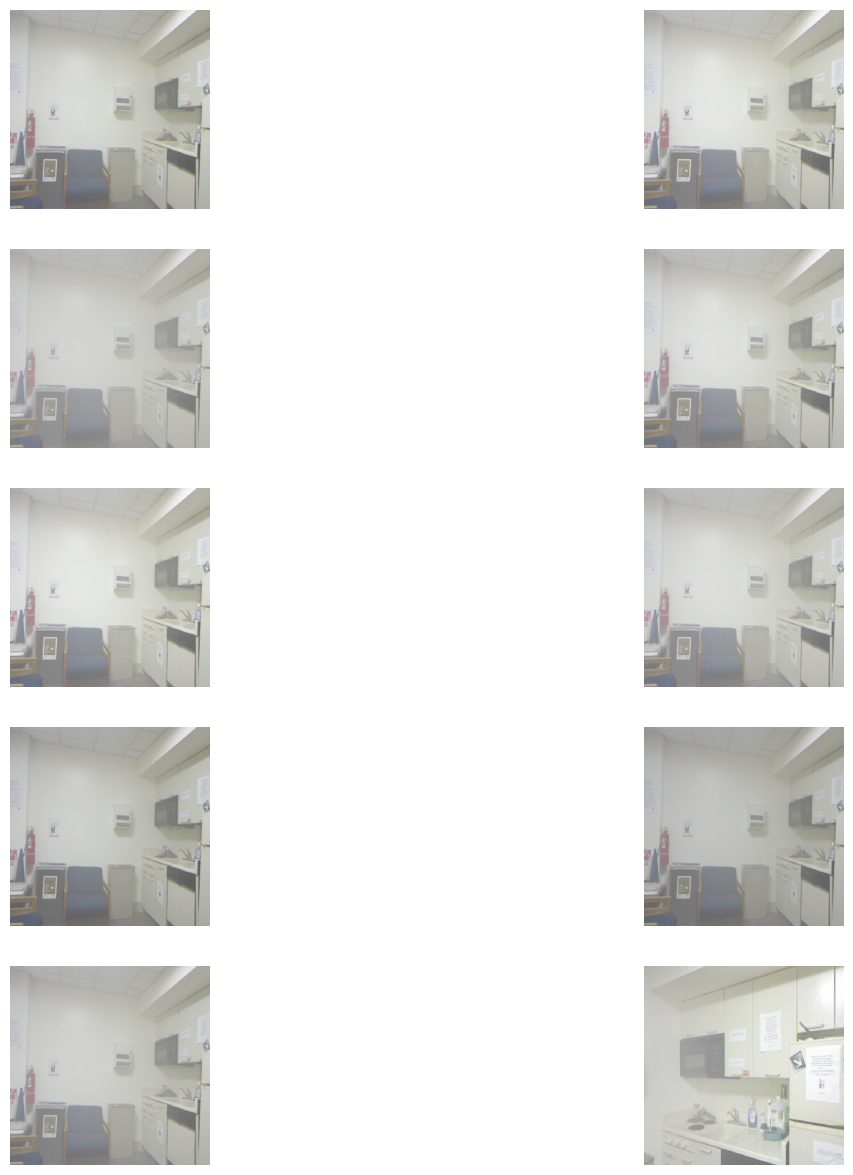

In [4]:
images=next(train_dataset)
plt.figure(figsize=(15,15))
print(np.shape(images[0][0][0]))
for i in range (0,10):
    plt.subplot(5,2,i+1)
    plt.imshow(images[0][0][i])
    plt.axis('off')

(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


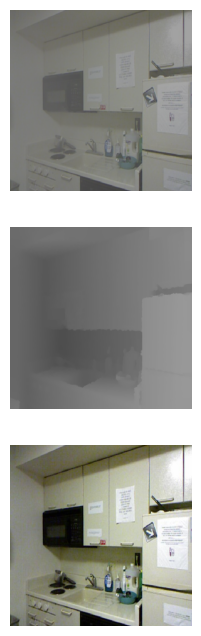

In [36]:
plt.figure(figsize=(8,8))
images=next(train_dataset)
plt.subplot(3,1,1)
plt.imshow(images[0][0][0])
plt.axis('off')
plt.subplot(3,1,2)
plt.imshow(images[0][1][0])
plt.axis('off')
plt.subplot(3,1,3)
plt.imshow(images[1][0])
plt.axis('off')

print(np.shape(images[0][0][0]))

print(np.shape(images[0][1][1]))

print(np.shape(images[1][0]))

In [19]:
# def sidnet():
#     # Encoder
#     inputs = tf.keras.Input(shape=(512, 512, 3),name='InpLayer')
#     conv1 = Conv2D(128, 3, activation='relu', padding='same',name='Conv2D_1')(inputs)
#     conv2 = Conv2D(64, 3, activation='relu', padding='same', strides=2,name='Conv2D_2')(conv1)
#     conv3 = Conv2D(32, 3, activation='relu', padding='same', strides=2,name='Conv2D_3')(conv2)

#     # Decoder
#     deconv1 = Conv2DTranspose(32, 3, activation='relu', padding='same', strides=2,name='ConvInv2D_1')(conv3)
#     upsampl1 = UpSampling2D(size=(2, 2), data_format='channels_last', interpolation="bilinear",name='Upsmpl1')(conv3)
#     skip1 = Concatenate(name='cnct1')([deconv1, upsampl1])

#     batch1=BatchNormalization()(skip1)
#     dense1=Dense(128,activation='relu')(batch1)
    
#     batch2=BatchNormalization()(dense1)
#     dense2=Dense(64,activation='relu')(batch2)

#     batch3=BatchNormalization()(dense2)
#     dense3=Dense(32,activation='relu')(batch3)
    
#     batch4=BatchNormalization()(dense3)
#     dense5=Dense(64,activation='relu')(batch4)

#     batch6=BatchNormalization()(dense5)
#     dense6=Dense(128,activation='relu')(batch6)
    
#     deconv2 = Conv2DTranspose(64, 3, activation='relu', padding='same', strides=2,name='ConvInv2D_2')(dense6)
#     upsampl2 = UpSampling2D(size=(2, 2), data_format='channels_last', interpolation="bilinear",name='Upsmpl2')(conv2)
#     skip2 = Concatenate(name='cnct2')([deconv2, upsampl2])
    
# #     deconv3 = Conv2DTranspose(256, 3, activation='relu', padding='same', strides=2)(skip3)
# #     upsampl4 = UpSampling2D(size=(2, 2), data_format='channels_last', interpolation="nearest")(conv1)
# #     skip4 = Concatenate()([deconv3, upsampl4])
    
#     output = Conv2D(3, 3, activation='sigmoid', padding='same',name='OutputConv')(skip2)

#     model = tf.keras.Model(inputs=inputs, outputs=output,name='dehazer')
#     return model

# # Create an instance of the modified SIDNet model
# model = sidnet()

In [73]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Concatenate, Conv2DTranspose, Add

def dehazing_network():
    hazy_input = tf.keras.Input(shape=(128, 128, 3),name='hazy')
    transmission_input = tf.keras.Input(shape=(128, 128, 1),name='trans')

    concat_input = Concatenate()([hazy_input, transmission_input])

    conv1 = Conv2D(64, 3, activation='relu', padding='same')(concat_input)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', strides=2)(conv1)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', strides=2)(conv2)

    deconv1 = Conv2DTranspose(128, 3, activation='relu', padding='same', strides=2)(conv3)
    skip1 = Add()([conv2, deconv1])

    deconv2 = Conv2DTranspose(64, 3, activation='relu', padding='same', strides=2)(skip1)
    skip2 = Add()([conv1, deconv2])

    output = Conv2D(3, 3, activation='sigmoid', padding='same')(skip2)

    model = tf.keras.Model(inputs=[hazy_input, transmission_input], outputs=output,name='cusmodel')
    return model

model = dehazing_network()

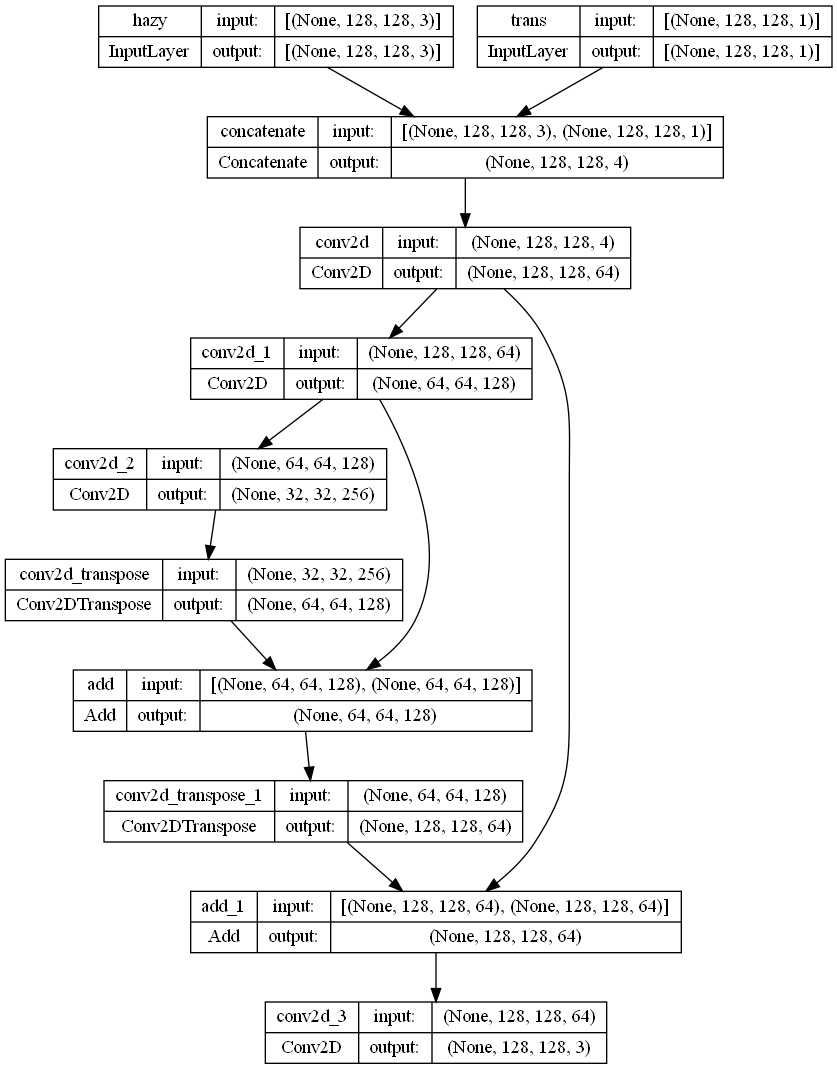

In [74]:
keras.utils.plot_model(model,show_shapes=True)

In [75]:
model.summary()

Model: "cusmodel"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 hazy (InputLayer)           [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 trans (InputLayer)          [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 128, 128, 4)          0         ['hazy[0][0]',                
                                                                     'trans[0][0]']               
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         2368      ['concatenate[0][0]']  

In [5]:
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.image import ssim  # Import SSIM

# Define your model and its architecture

# Define loss calculation function
def total_loss(y_true, y_pred):
    lambda_mse = 2.5  # Adjust as needed
    lambda_mae = 2.5
    lambda_ssim = 40  # Adjust as needed
    lambda_color = 20  # Adjust the weight as needed

    # Compute MSE loss
    mse = MeanSquaredError()(y_true, y_pred)

    # Compute MAE loss
    mae = MeanAbsoluteError()(y_true, y_pred)

    # Compute SSIM loss
    ssim_loss = 1 - ssim(y_true, y_pred, max_val=1.0)  # max_val should match your image range (e.g., 0-1)

    # Custom color loss based on color histograms
    def color_loss(y_true, y_pred):
        # Convert the images to grayscale
        y_true_gray = tf.image.rgb_to_grayscale(y_true)
        y_pred_gray = tf.image.rgb_to_grayscale(y_pred)

        # Calculate the MSE between the grayscale images
        color_loss = tf.reduce_mean(tf.square(y_true_gray - y_pred_gray))

        return color_loss

    # Compute color loss
    color = color_loss(y_true, y_pred)

    # Combine losses with weights
    loss = (
        lambda_mse * mse +
        lambda_mae * mae +
        lambda_ssim * ssim_loss +
        lambda_color * color
    )

    return loss

In [6]:
model=keras.models.load_model('modelTwo.h5',custom_objects={'total_loss':total_loss})

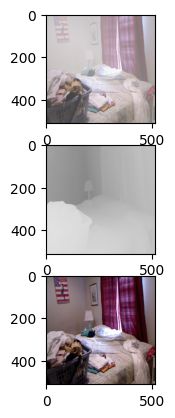

In [11]:
image_batch1=next(val_dataset)
x1=image_batch1[0][0][0]
x2=image_batch1[0][1][0]
y=image_batch1[1][0]
plt.subplot(3,1,1)
plt.imshow(x1)
plt.subplot(3,1,2)
plt.imshow(x2)
plt.subplot(3,1,3)
plt.imshow(y)

In [12]:
x1=np.reshape(x1,(512,512,3))
x2=np.reshape(x2,(512,512,3))

In [190]:
prdn1=model.predict([np.array([x1]),np.array([x2])])

1/1 [==============================] - 0s 378ms/step


(-0.5, 511.5, 511.5, -0.5)

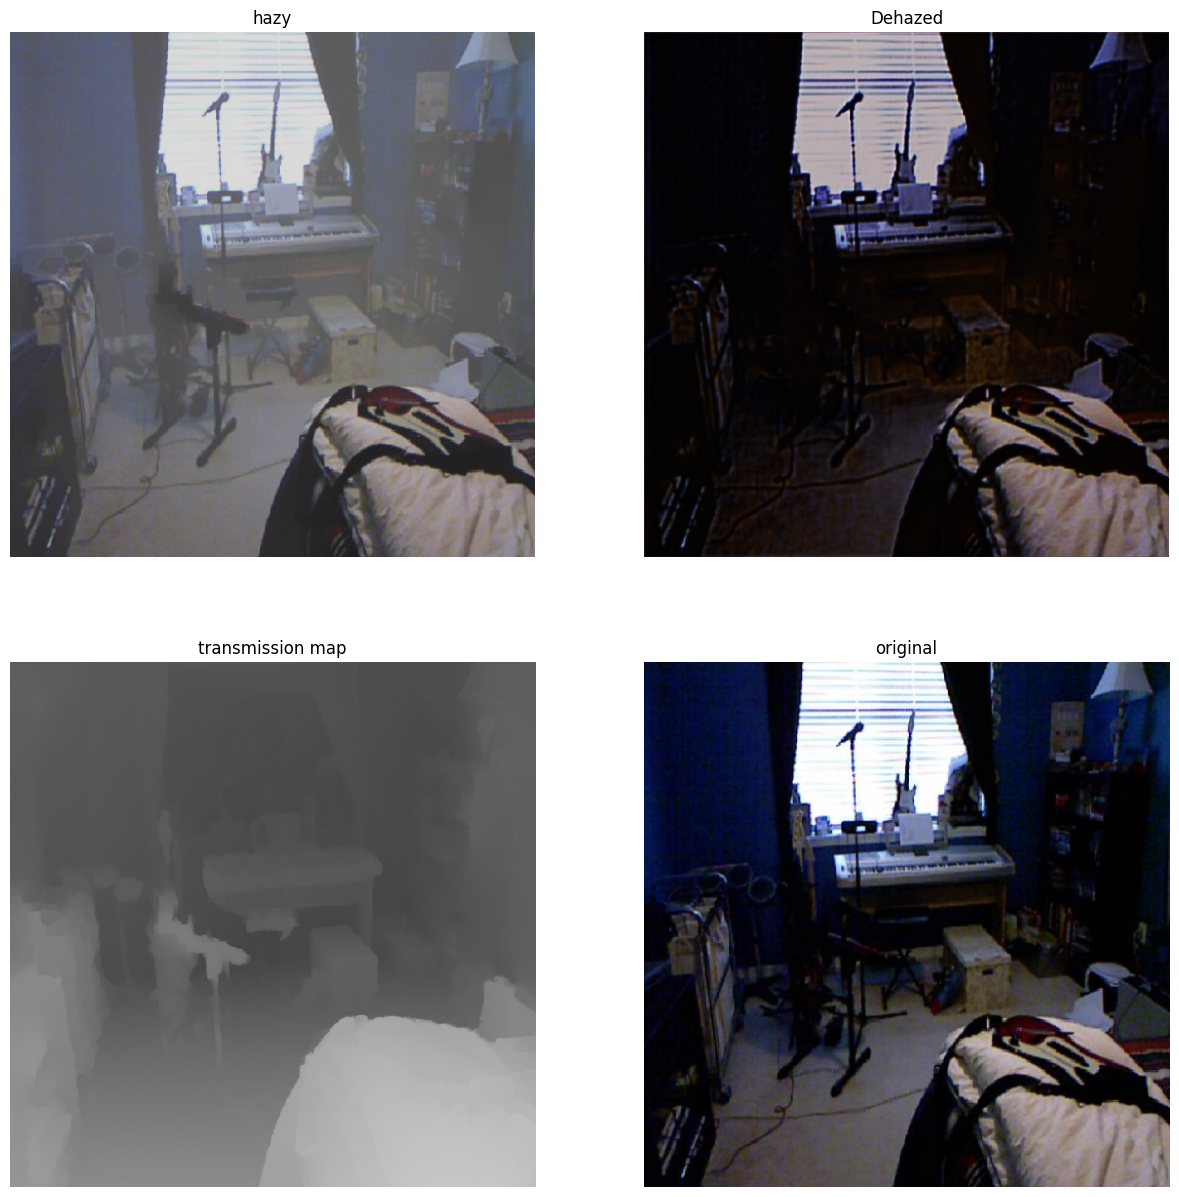

In [191]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.imshow(x1)
plt.title('hazy')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(prdn1[0])
plt.title('Dehazed')
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(x2)
plt.title('transmission map')
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(y)
plt.title('original')
plt.axis('off')

In [271]:
import cv2
import numpy as np

def calculate_transmission_map(hazy_image, window_size=1, percentile=0.001, omega=0.99):
    """Calculate the transmission map of a hazy image using the Dark Channel Prior method."""
    
    def dark_channel(image):
        """Calculate the dark channel of an image."""
        min_channel = np.min(image, axis=2)
        return cv2.erode(min_channel, np.ones((window_size, window_size), np.uint8))
    
    def estimate_atmospheric_light(image, dark_channel):
        """Estimate the atmospheric light of an image."""
        flat_dark_channel = dark_channel.flatten()
        num_pixels = flat_dark_channel.size
        num_pixels_to_keep = int(num_pixels * percentile)
        sorted_dark_channel = np.sort(flat_dark_channel)
        atmospheric_light = np.mean(sorted_dark_channel[-num_pixels_to_keep:])
        return atmospheric_light
    
    def estimate_transmission(image, atmospheric_light):
        """Estimate the transmission map of an image."""
        normalized_image = image.astype(np.float32) / atmospheric_light
        dark_ch = dark_channel(normalized_image)
        transmission_map = 1-(omega * dark_ch)
        return transmission_map

    # Calculate the dark channel
    dark_ch = dark_channel(hazy_image)

    # Estimate the atmospheric light
    atmospheric_light = estimate_atmospheric_light(hazy_image, dark_ch)

    # Estimate the transmission map
    transmission_map = estimate_transmission(hazy_image, atmospheric_light)

    # Convert the transmission map to 3 channels
    transmission_map_3ch = cv2.cvtColor(transmission_map, cv2.COLOR_GRAY2BGR)

    return transmission_map_3ch

In [272]:
# import cv2
# import numpy as np

# def generate_transmission_map(image):
#     # Calculate the dark channel of the image
#     dark_channel = np.min(image, axis=2)

#     # Estimate the atmospheric light
#     atmospheric_light = np.percentile(dark_channel, 99)

#     # Normalize the image
#     normalized_image = image / atmospheric_light

#     # Calculate the transmission map using the Dark Channel Prior
#     transmission_map = (0.95 * np.min(normalized_image, axis=2))

#     # Apply a guided filter to refine the transmission map
#     radius = 512
#     epsilon = 0.001
#     transmission_map = guided_filter(image, transmission_map, radius, epsilon)

#     return transmission_map

# def guided_filter(I, p, radius, epsilon):
#     p = np.stack([p] * I.shape[2], axis=2)
#     mean_I = cv2.boxFilter(I, cv2.CV_64F, (radius, radius))
#     mean_p = cv2.boxFilter(p, cv2.CV_64F, (radius, radius))
#     mean_Ip = cv2.boxFilter(I * p, cv2.CV_64F, (radius, radius))
#     cov_Ip = mean_Ip - mean_I * mean_p

#     mean_II = cv2.boxFilter(I * I, cv2.CV_64F, (radius, radius))
#     var_I = mean_II - mean_I * mean_I

#     a = cov_Ip / (var_I + epsilon)
#     b = mean_p - a * mean_I

#     mean_a = cv2.boxFilter(a, cv2.CV_64F, (radius, radius))
#     mean_b = cv2.boxFilter(b, cv2.CV_64F, (radius, radius))

#     q = mean_a * I + mean_b
#     return q

In [273]:
# import numpy as np

# def generate_transmission_map(image):
#     # Calculate the dark channel of the image
#     dark_channel = np.min(image, axis=2)

#     # Estimate the atmospheric light
#     atmospheric_light = np.percentile(dark_channel, 99)

#     # Normalize the image
#     normalized_image = image / atmospheric_light

#     # Calculate the transmission map
#     transmission_map = 0.99 * np.min(normalized_image, axis=2)

#     # Replicate the transmission map to three channels
#     transmission_map = np.stack([transmission_map] * 3, axis=2)

#     return transmission_map

(-0.5, 511.5, 511.5, -0.5)

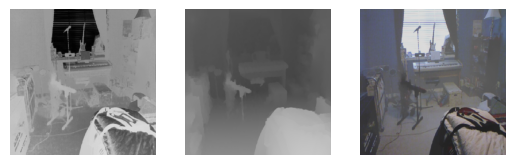

In [274]:

hazy_image=x1
transmission_map = calculate_transmission_map(hazy_image)
plt.subplot(1,3,1)
plt.imshow(transmission_map,cmap='Greys')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(x2)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(x1)
plt.axis('off')

1/1 [==============================] - 0s 367ms/step


(-0.5, 511.5, 511.5, -0.5)

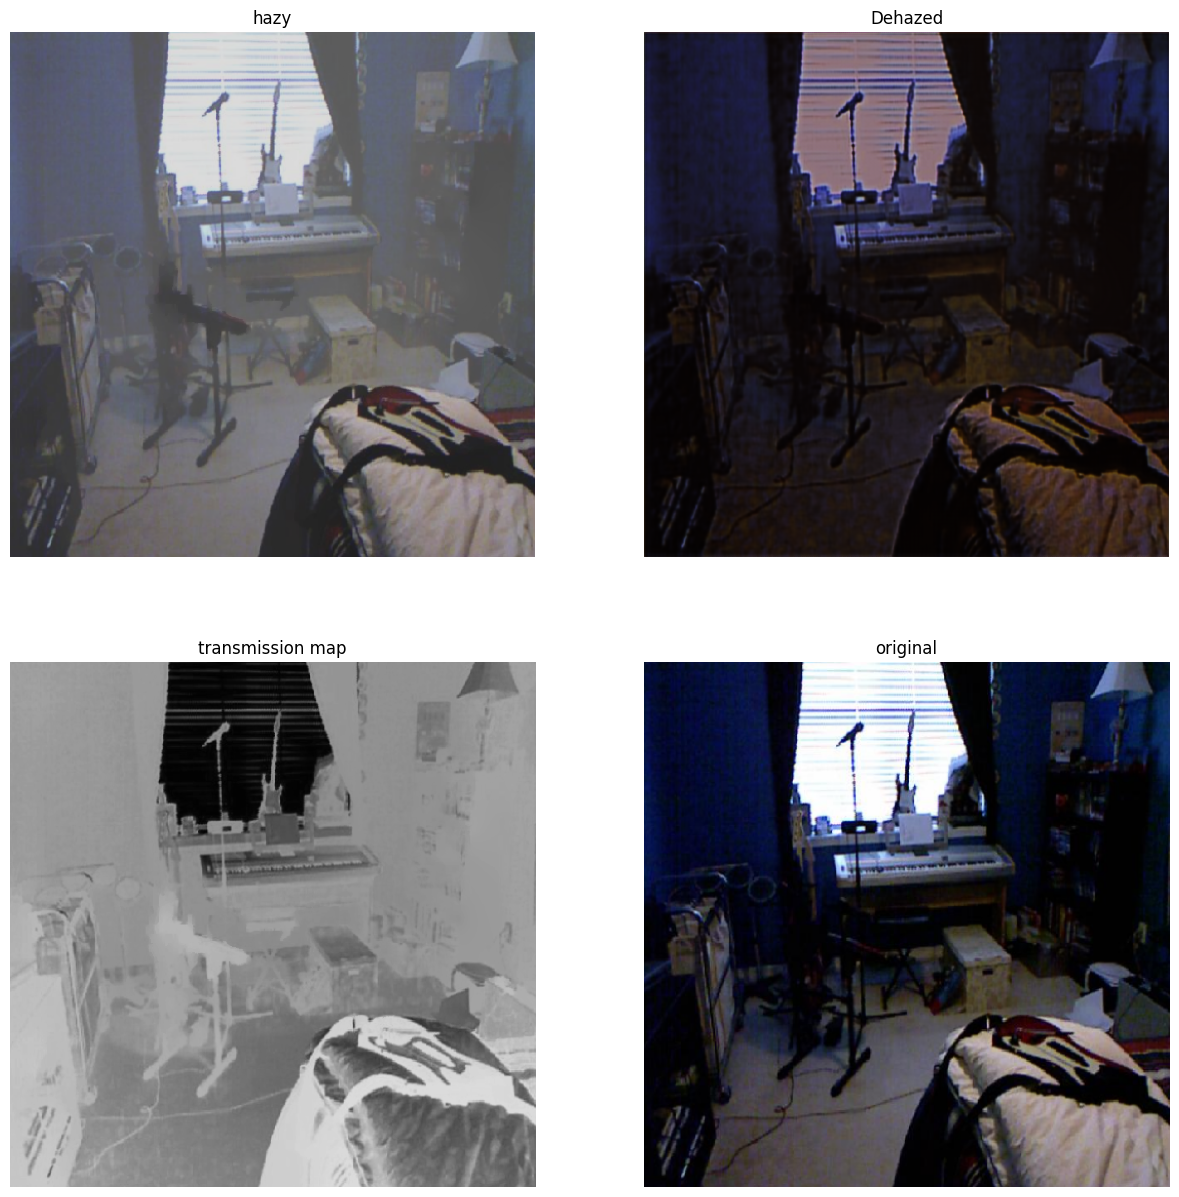

In [275]:
prdn=model.predict([np.array([x1]),np.array([transmission_map])])
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(x1)
plt.title('hazy')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(prdn[0])
plt.title('Dehazed')
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(transmission_map)
plt.title('transmission map')
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(y)
plt.title('original')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

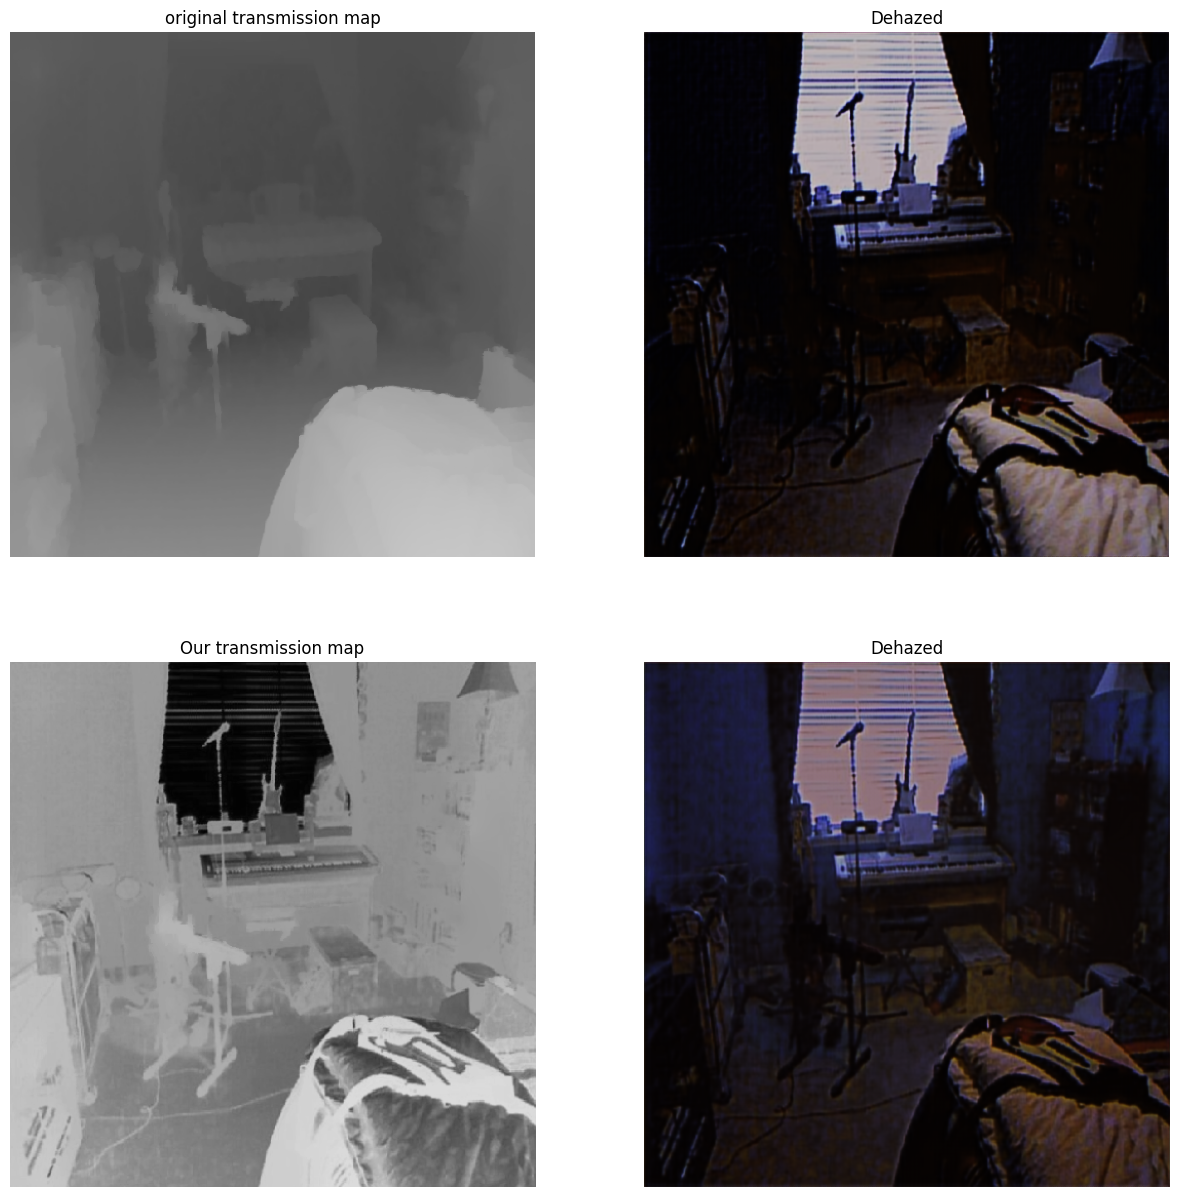

In [276]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(x2)
plt.title('original transmission map')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(prdn1[0])
plt.title('Dehazed')
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(transmission_map)
plt.title('Our transmission map')
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(prdn[0])
plt.title('Dehazed')
plt.axis('off')